<a href="https://colab.research.google.com/github/mokshpapneja/1/blob/main/code_Iris_Deep_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Example - Iris Problem

This examples demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

### 5.1 Setup

In [ ]:
#Install related libraries for the course.
#This is a common requirement for all other examples too



!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2ead99b18910f11ccd0c804737facfdfef0f467d0ce4cb5a790970d0b7e42359
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 4.2. Prepare Input Data for Deep Learning

Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets


In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load Data and review content
iris_data = pd.read_csv("https://raw.githubusercontent.com/ibtissammakdoun/Introduction-au-deep-learning/main/iris.csv")
# Reads csv file from the pandas framework

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head()) #Prints the column heads

#Use a Label encoder to convert String to numeric values
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  # This is done to define the target: Type of flower into a numeric representation
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])

#Convert input to numpy array
np_iris = iris_data.to_numpy() # Numpy array is preferred input format for keras

#Separate feature and target variables
X_data = np_iris[:,0:4] #Takes all data for the first 4 columns: 0,1,2,3 --> Sepal lenth,width and Petal length,width
Y_data=np_iris[:,4]#Takes all data and their last column indicating their species that we have to predict

#Prints data onto console --> For first 5 values
print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data) # Standardizes the input data

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)#Setosa--> 0--> 100 ; 1--> 010 ; 2--> 001 as model target is a multiclass we use one-hot encoding

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)#Test data is 10% and training data is 90% of the whole dataset

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Loaded Data :
------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Targe

### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [ ]:

from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3 # Represents the no. of target classes

#Create a sequencial model in Keras
model = tf.keras.models.Sequential() # A sequential model in keras will have a sequence of layers and hidden layers

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables--> Sepal and Petal Height and width
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function--> Relu for hidden layer 1

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,# Output nodes == No. of classes
                             name='Output-Layer',
                             activation='softmax')) # Softmax activation function will just selec max probability among the 3 that coe at the node:- (0.7,0.2,0.9)-->0.9

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy', #Need categorical error function
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform
forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/20
7/7 [==============================] - 1s 28ms/step - loss: 0.9488 - accuracy: 0.6389 - val_loss: 0.7745 - val_accuracy: 0.7037
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6131 - accuracy: 0.8519 - val_loss: 0.6119 - val_accuracy: 0.7037
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.8704 - val_loss: 0.5261 - val_accuracy: 0.7407
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3769 - accuracy: 0.8704 - val_loss: 0.4744 - val_accuracy: 0.7778
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3262 - accuracy: 0.8796 - val_loss: 0.4373 - val_accuracy: 0.7778
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.8519 - val_loss: 0.4086 - val_accuracy: 0.8148
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.8796 - val_loss: 0.3812

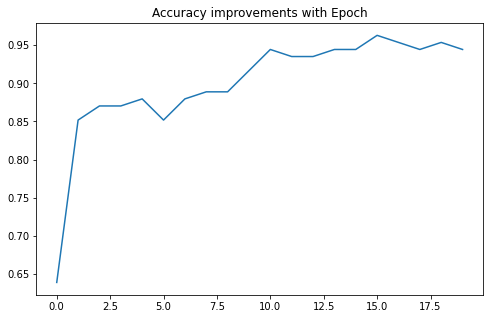


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 18ms/step - loss: 0.1981 - accuracy: 0.9333


[0.19805912673473358, 0.9333333373069763]

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1# Print progress during training

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16 # Batch size given for faster computations
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)#Trains the model

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### 4.5. Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [ ]:
#Saving a model

model.save("iris_save")

#Loading a Model
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 2)                 10        
                                                                 
 Hidden-Layer-2 (Dense)      (None, 2)                 6         
                                                                 
 Output-Layer (Dense)        (None, 3)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### 4.6. Predictions with Deep Learning Models

In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


Raw Prediction Output (Probabilities) : [[0.28652048 0.31853855 0.39494097]]
Prediction is  ['virginica']


In [ ]:
for layer in loaded_model.layers: print(layer.get_weights())


[array([[ 0.8359249 ,  0.8190445 ],
       [-0.5539482 , -0.9854561 ],
       [-0.60933626, -0.40825883],
       [ 0.0203304 , -0.5808915 ]], dtype=float32), array([-0.04449978, -0.03751288], dtype=float32)]
[array([[ 0.07239337,  0.83858216],
       [ 0.38906744, -0.97707057]], dtype=float32), array([-0.00182586, -0.04882694], dtype=float32)]
[array([[-0.84117925, -0.33386418,  0.6198642 ],
       [ 0.5622749 ,  0.80120355,  0.4471838 ]], dtype=float32), array([ 0.02371891,  0.00255361, -0.02139328], dtype=float32)]


In [ ]:


#Number of classes in the target variable
NB_CLASSES=3 # Represents the no. of target classes

#Create a sequencial model in Keras
model1 = tf.keras.models.Sequential() # A sequential model in keras will have a sequence of layers and hidden layers

#Add the first hidden layer
model1.add(keras.layers.Dense(2,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables--> Sepal and Petal Height and width
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function--> Relu for hidden layer 1

#Add a second hidden layer
model1.add(keras.layers.Dense(2,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model1.add(keras.layers.Dense(NB_CLASSES,# Output nodes == No. of classes
                             name='Output-Layer',
                             activation='softmax')) # Softmax activation function will just selec max probability among the 3 that coe at the node:- (0.7,0.2,0.9)-->0.9

#Compile the model with loss & metrics
model1.compile(loss='categorical_crossentropy', #Need categorical error function
              metrics=['accuracy'])

#Print the model meta-data
model1.summary()
print(model.layers)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 2)                 10        
                                                                 
 Hidden-Layer-2 (Dense)      (None, 2)                 6         
                                                                 
 Output-Layer (Dense)        (None, 3)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
[<keras.layers.core.dense.Dense object at 0x7f0be84c0710>, <keras.layers.core.dense.Dense object at 0x7f0be84c0d10>, <keras.layers.core.dense.Dense object at 0x7f0be84a3b90>]


In [ ]:
# Setting new weights and biases
i=0
for layer in loaded_model.layers:
  a = layer.get_weights()
  model1.layers[i].set_weights(a)
  i+=1
  print(layer.get_weights())

print("-------------------------------------------------------------------------------")

for layer1 in model1.layers:
  print(layer1.get_weights())

[array([[ 0.8359249 ,  0.8190445 ],
       [-0.5539482 , -0.9854561 ],
       [-0.60933626, -0.40825883],
       [ 0.0203304 , -0.5808915 ]], dtype=float32), array([-0.04449978, -0.03751288], dtype=float32)]
[array([[ 0.07239337,  0.83858216],
       [ 0.38906744, -0.97707057]], dtype=float32), array([-0.00182586, -0.04882694], dtype=float32)]
[array([[-0.84117925, -0.33386418,  0.6198642 ],
       [ 0.5622749 ,  0.80120355,  0.4471838 ]], dtype=float32), array([ 0.02371891,  0.00255361, -0.02139328], dtype=float32)]
-------------------------------------------------------------------------------
[array([[ 0.8359249 ,  0.8190445 ],
       [-0.5539482 , -0.9854561 ],
       [-0.60933626, -0.40825883],
       [ 0.0203304 , -0.5808915 ]], dtype=float32), array([-0.04449978, -0.03751288], dtype=float32)]
[array([[ 0.07239337,  0.83858216],
       [ 0.38906744, -0.97707057]], dtype=float32), array([-0.00182586, -0.04882694], dtype=float32)]
[array([[-0.84117925, -0.33386418,  0.6198642 ],
  

In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)
raw_prediction = model1.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

Raw Prediction Output (Probabilities) : [[0.28652048 0.31853855 0.39494097]]
Prediction is  ['virginica']
